In [9]:
# เรียกใช้ library สำหรับทำงานประกอบด้วย numpy pandas seaborn เเละ matplotlib
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt


In [10]:
# อ่านข้อมูลไฟล์ csv จาก https://github.com/nawinpoyen7/MachineLearning/blob/main/CustomerSegmentationClassification.csv 
# และเเสดง 5 ตัวอย่างเเรก เพื่อตรวจสอบข้อมูล
url='https://raw.githubusercontent.com/nawinpoyen7/MachineLearning/main/DataSet/DataChange.csv'
df=pd.read_csv(url)
df.sample(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
1271,463008,1,0,53,0,2,1,0,7,5,A
2159,464655,1,1,39,1,5,0,1,5,3,A
6604,461198,0,0,89,1,5,1,0,1,5,D
7447,459077,0,1,82,0,5,0,2,2,5,A
7248,467921,0,0,43,1,0,1,0,4,5,A


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               8068 non-null   int64 
 1   Gender           8068 non-null   int64 
 2   Ever_Married     8068 non-null   int64 
 3   Age              8068 non-null   int64 
 4   Graduated        8068 non-null   int64 
 5   Profession       8068 non-null   int64 
 6   Work_Experience  8068 non-null   int64 
 7   Spending_Score   8068 non-null   int64 
 8   Family_Size      8068 non-null   int64 
 9   Var_1            8068 non-null   int64 
 10  Segmentation     8068 non-null   object
dtypes: int64(10), object(1)
memory usage: 693.5+ KB


In [77]:
# เเสดงหัวข้อในเเต่ละคอลัมน์ของฐานข้อมูล
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

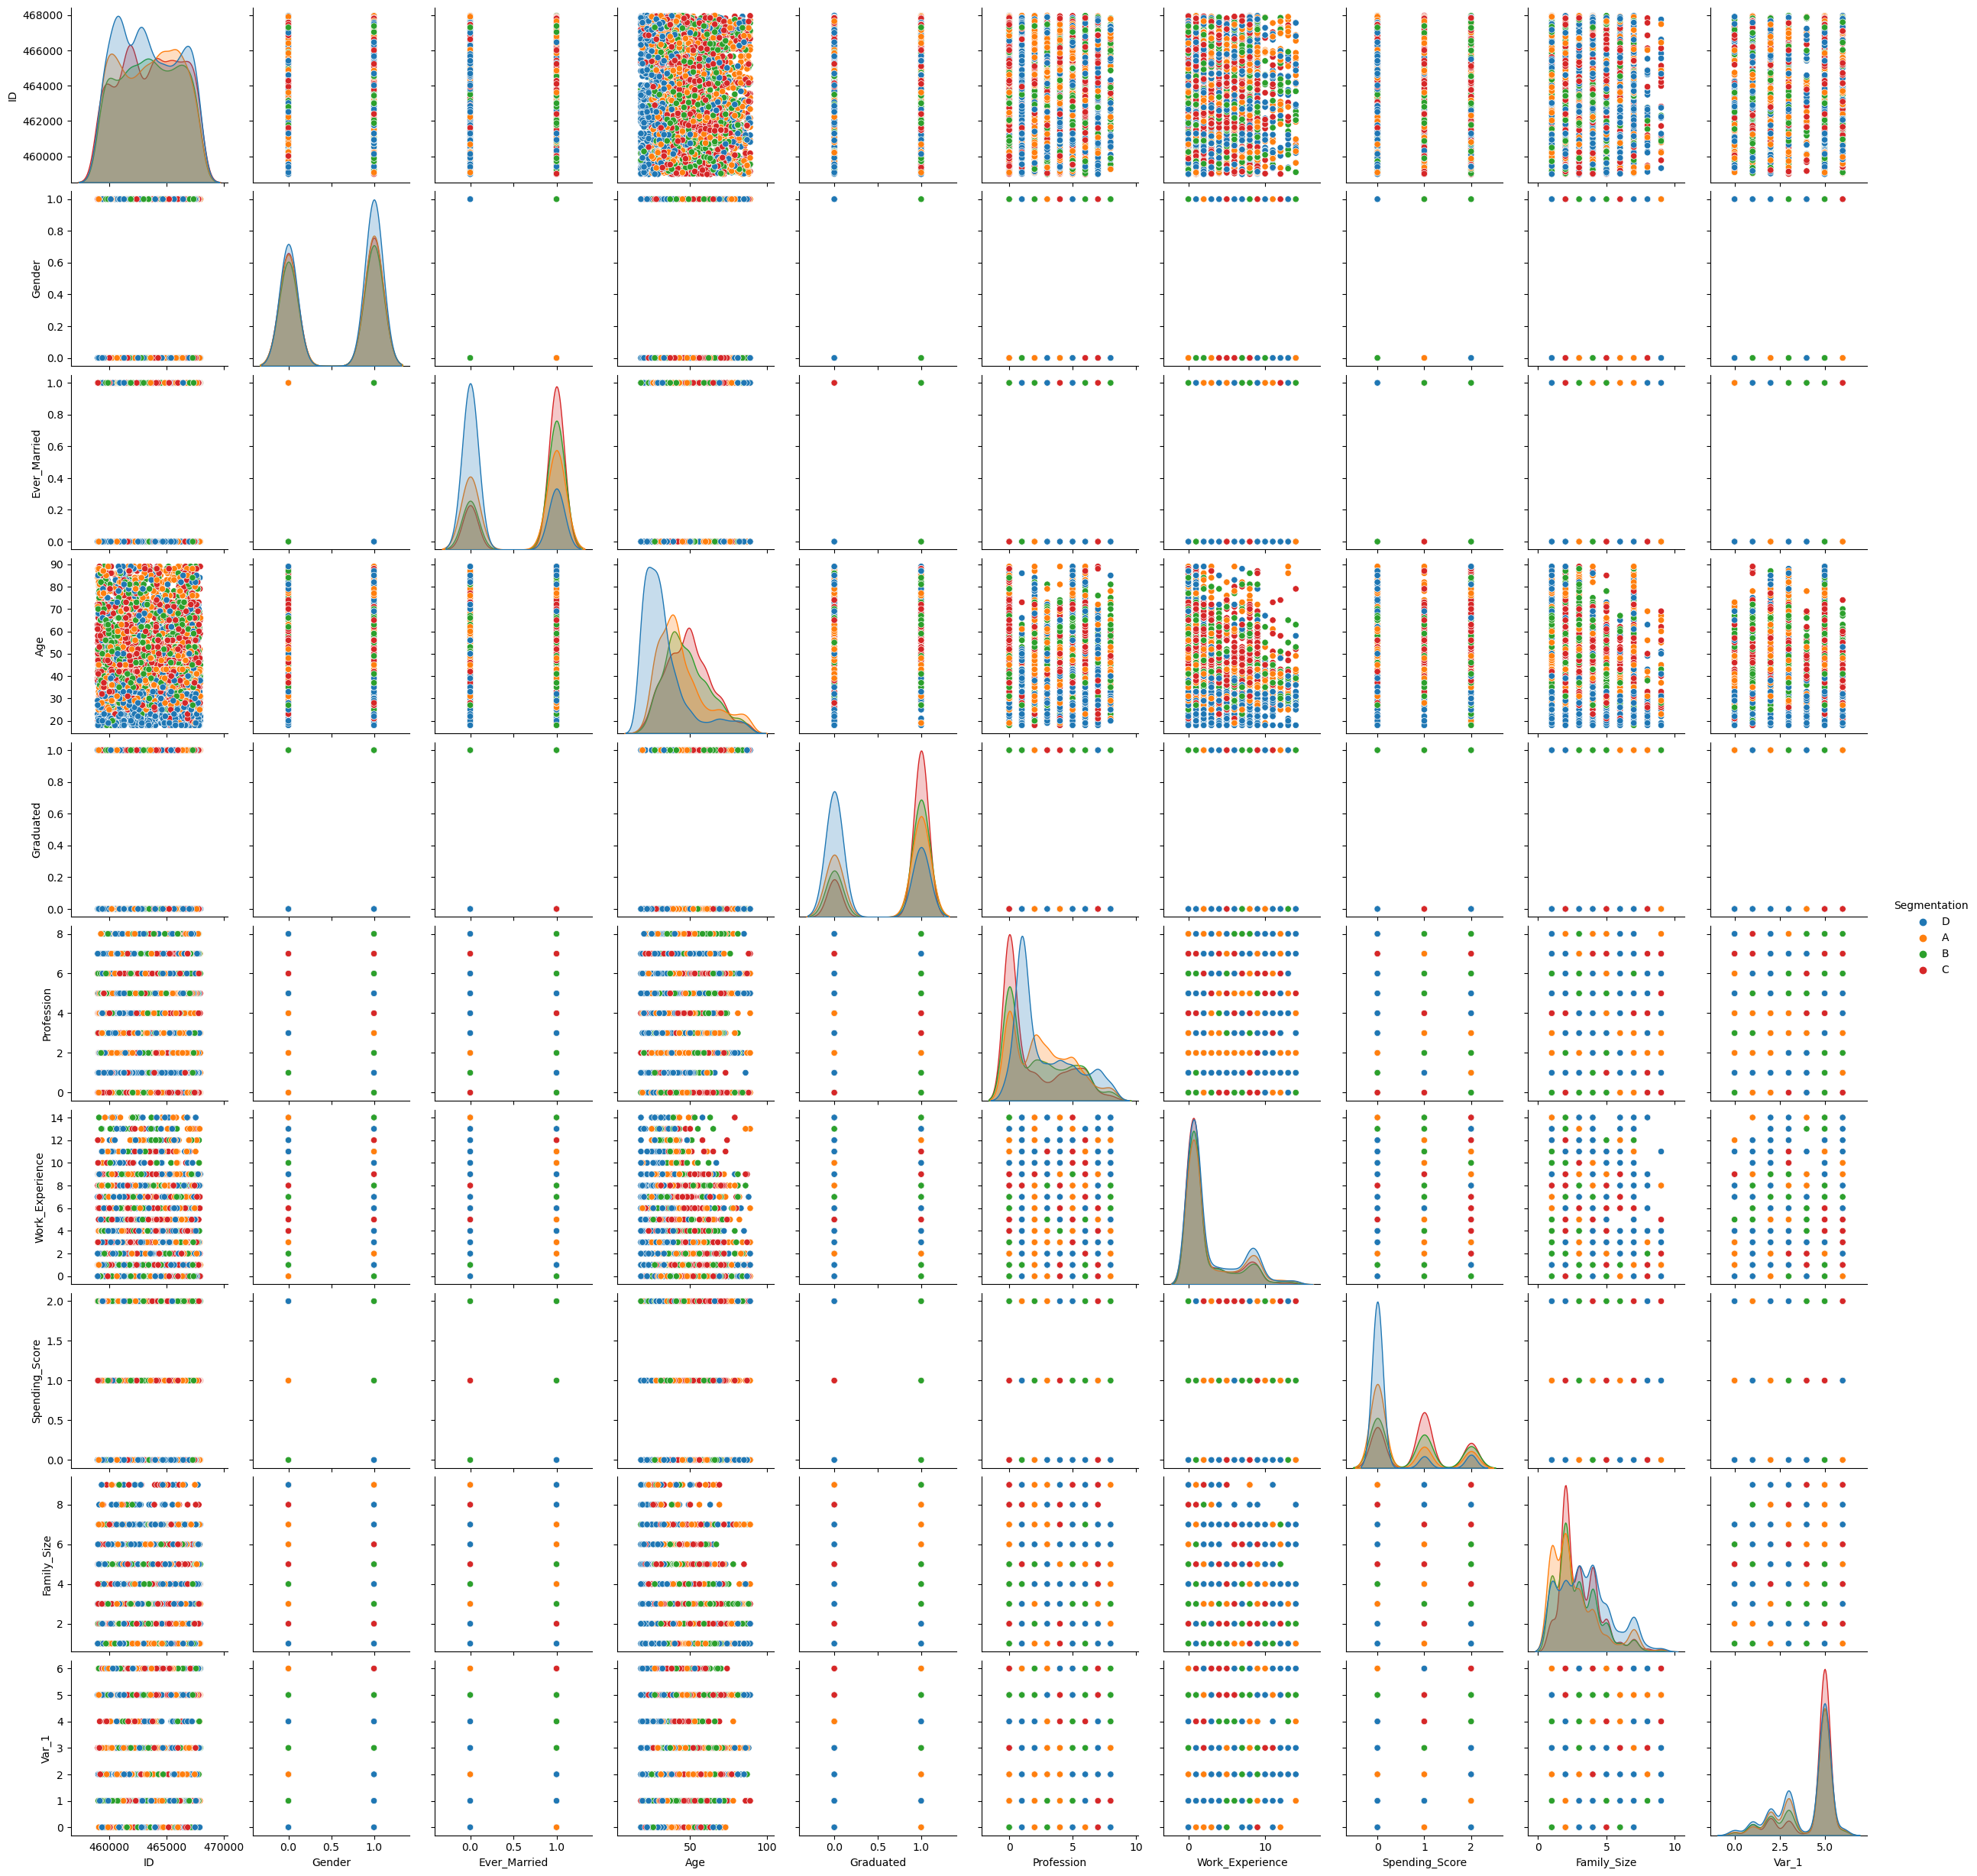

In [100]:
# ในตัวอย่างนี้เลือกพิจารณาเพียง 4 หัวข้อ (Age) (Work_Experience)(Spending_Score)(Family_Size)
cols=['Ever_Married','Age', 'Graduated', 'Work_Experience', 'Spending_Score', 'Family_Size']
# สร้างตัวเเปร ชื่อ cols เพื่อเก็บตัวเเปรที่สนใน ได้เเก่ Age Work_Experience Spending_Score Family_Size
sns.pairplot(data=df,hue='Segmentation');

In [11]:
# จัดกลุ่มข้อมูล (Classification) ด้วยวิธี K-Nearest Neighbours โดยใช้ library ของ scikit learn
# นำเข้าคลาสของ KNeighborsClassifier StandardScaler เเละ train_test_split จาก scikit learn โดย
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler # ปรับช่วงข้อมูลด้วยวิธี standardization

In [24]:
# แบ่งชุดข้อมูลออกเป็นชุดฝึกฝนเเละชุดทดสอบ
test_size=0.2
X_train, X_test, y_train, y_test = train_test_split(
    df[['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession', 'Family_Size', 'Spending_Score']], 
    df.Segmentation, 
    test_size=test_size, random_state=7)

In [25]:
y_train.head()

6606    C
1355    B
1067    A
4217    A
7793    D
Name: Segmentation, dtype: object

In [26]:
X_train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Family_Size,Spending_Score
6606,0,1,62,1,0,2,2
1355,1,1,56,1,0,3,1
1067,1,1,48,0,5,4,1
4217,1,1,81,0,2,1,0
7793,0,0,36,1,3,3,0


In [27]:
# สร้างแบบจำลอง K-Nearest Neighbours ด้วยคลาส KNeighborsClassifier ใน Sklearn
prefer_k = 5  # สร้างตัวเเปรสำหรับเก็บ k ที่ต้องการ
model = KNeighborsClassifier(n_neighbors=prefer_k)
model

KNeighborsClassifier()

In [28]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [29]:
# ทดลองดูค่าผิดพลาดของแบบจำลองที่สร้างขึ้นโดยใช้ค่า  R2
model.score(X_train, y_train)

0.6234893089556864

In [30]:
model.score(X_test, y_test)

0.47273853779429986

In [31]:
# ทดลองทดสอบประสิทธิภาพแบบจำลองด้วย cross validation
from sklearn.model_selection import cross_val_score 

In [32]:
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
scores

array([0.46398141, 0.44694036, 0.464756  , 0.4531371 , 0.46511628])

In [33]:
# เเสดงค่าเฉลี่ยเเละค่าเบี่ยงเบนมาตรฐานของประสิทธิภาพ
from numpy import mean, std
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.459 (0.007)


In [34]:
# ทดลองเเสดงค่าผลทำนายจากชุดข้อมูลทดสอบ
predicted = model.predict(X_test)

In [35]:
from sklearn import metrics
print(metrics.classification_report(y_test,predicted,target_names=df.Segmentation.unique(), digits=3))

              precision    recall  f1-score   support

           D      0.382     0.475     0.423       394
           A      0.379     0.334     0.355       395
           B      0.496     0.485     0.490       390
           C      0.646     0.586     0.614       435

    accuracy                          0.473      1614
   macro avg      0.476     0.470     0.471      1614
weighted avg      0.480     0.473     0.474      1614



In [36]:
# กำหนดช่วงค่า K ที่ต้องการทดสอบให้เท่ากับ 1 ถึง 100
k_list = list(range(1,100+1))
k_values = dict(n_neighbors=k_list)

In [37]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model, k_values, cv=5, scoring='accuracy')

In [38]:
# เรียนรู้แบบจำลอง
grid.fit(df[['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession', 'Family_Size', 'Spending_Score']], df.Segmentation)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

In [39]:
# แสดงค่าประสิทธิภาพที่ได้
grid.cv_results_
grid_table = pd.DataFrame(grid.cv_results_)
grid_table.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.054803,0.003655,0.184211,0.012953,1,{'n_neighbors': 1},0.418216,0.426270,0.420074,0.448233,0.441414,0.430841,0.011920,99
1,0.052603,0.000490,0.183211,0.000980,2,{'n_neighbors': 2},0.397770,0.402726,0.402107,0.426534,0.423435,0.410514,0.011978,100
2,0.052003,0.000632,0.186811,0.004622,3,{'n_neighbors': 3},0.457249,0.451673,0.444238,0.461252,0.464352,0.455753,0.007151,98
3,0.053003,0.001549,0.198811,0.023131,4,{'n_neighbors': 4},0.451673,0.450434,0.442999,0.455673,0.485431,0.457242,0.014679,97
4,0.057003,0.003287,0.208612,0.012372,5,{'n_neighbors': 5},0.453532,0.460347,0.451053,0.475511,0.497830,0.467655,0.017325,96


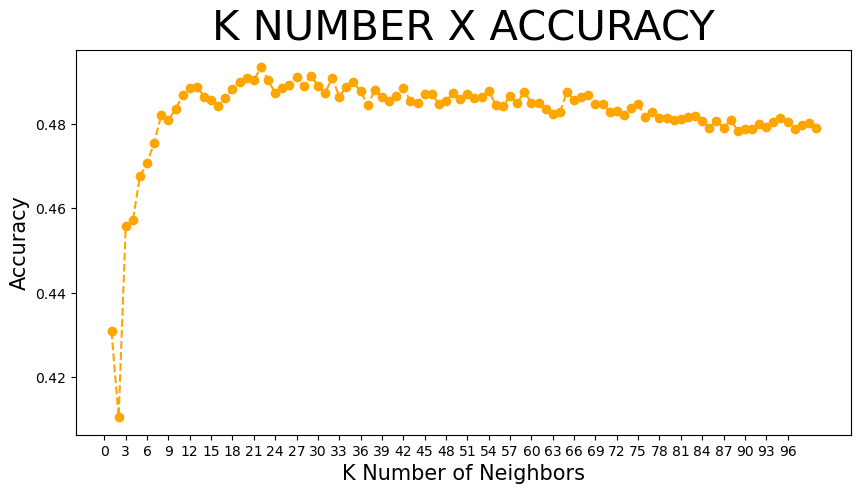

In [40]:
# ทดลองพล็อตกราฟค่าประสิทธิภาพ
graphic = grid.cv_results_['mean_test_score']
graphic

plt.figure(figsize=(10,5))
plt.plot(k_list,graphic,color='orange',linestyle='dashed',marker='o')
plt.xlabel('K Number of Neighbors', fontdict={'fontsize': 15})
plt.ylabel('Accuracy', fontdict={'fontsize': 15})
plt.title('K NUMBER X ACCURACY', fontdict={'fontsize': 30})
plt.xticks(range(0,99,3),)
plt.show()

In [42]:
# เเสดงค่า k ที่ให้ประสิทธิภาพสูงสุด
print("The best value of k = {} with {} of accuracy.".format(grid.best_params_,grid.best_score_))

The best value of k = {'n_neighbors': 22} with 0.49343162086854714 of accuracy.
